# Keras- The Happy House
### Md Asif Shahjalal
### University of Michigan-Dearborn
### MSE in COmputer Engineering

# Loading the libraries

In [1]:
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## 1 - The Happy House 

<img src="https://i.imgur.com/OHi0A1V.png" style="width:550px;height:250px;">


# Loading the dataset 

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

happy_train_data,b = np.where(Y_train == 1)
unhappy_train_data,b = np.where(Y_train == 0)
happy_test_data,b = np.where(Y_test == 1)
unhappy_test_data,b = np.where(Y_test == 0)

print("Total happy images in training set: " + str(len(happy_train_data)))
print("Total unhappy images in training set: " + str(len(unhappy_train_data)))
print("Total happy images in test set: " + str(len(happy_test_data)))
print("Total happy images in test set: " + str(len(unhappy_test_data)))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)
Total happy images in training set: 300
Total unhappy images in training set: 300
Total happy images in test set: 84
Total happy images in test set: 66


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures


## 2 - Building a model in Keras


In [3]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
     
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    
    return model

In [4]:
X_train.shape[1:4]

(64, 64, 3)

You have now built a function to describe your model. To train and test this model, there are four steps in Keras:
1. Create the model by calling the function above
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`

If you want to know more about `model.compile()`, `model.fit()`, `model.evaluate()` and their arguments, refer to the official [Keras documentation](https://keras.io/models/model/).

**Exercise**: Implement step 1, i.e. create the model.

### Creating the model

In [5]:
input_shape = (64,64,3)
happyModel = HappyModel(X_train.shape[1:4])

### Compile the model to configure the learning process. 

In [6]:
happyModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


### Train the model

In [7]:
happyModel.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 16)

Epoch 1/40
600/600 [==============================] - 15s - loss: 1.2626 - acc: 0.6600    
Epoch 2/40
600/600 [==============================] - 15s - loss: 0.3203 - acc: 0.8683    
Epoch 3/40
600/600 [==============================] - 15s - loss: 0.2002 - acc: 0.9183    
Epoch 4/40
600/600 [==============================] - 15s - loss: 0.1394 - acc: 0.9500    
Epoch 5/40
600/600 [==============================] - 16s - loss: 0.1777 - acc: 0.9317    
Epoch 6/40
600/600 [==============================] - 18s - loss: 0.2153 - acc: 0.9200    
Epoch 7/40
600/600 [==============================] - 18s - loss: 0.1076 - acc: 0.9583    
Epoch 8/40
600/600 [==============================] - 18s - loss: 0.1052 - acc: 0.9667    
Epoch 9/40
600/600 [==============================] - 24s - loss: 0.1928 - acc: 0.9367    
Epoch 10/40
600/600 [==============================] - 26s - loss: 0.0631 - acc: 0.9733    
Epoch 11/40
600/600 [==============================] - 26s - loss: 0.0415 - acc: 0.9900  

### Evaluating the model

In [8]:
preds = happyModel.evaluate(x = X_test, y = Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 3s     

Loss = 1.83440534115
Test Accuracy = 0.626666665077


## 3 - Test with  own image
The training/test sets were quite similar; for example, all the pictures were taken against the same background (since a front door camera is always mounted in the same position). This makes the problem easier, but a model trained on this data may or may not work on your own data.

happy1 [[ 1.]]
happy2 [[ 1.]]
happy3 [[ 0.]]
happy4 [[ 0.]]
sad5 [[ 0.]]
sad6 [[ 0.]]
sad7 [[ 0.]]
sad8 [[ 0.]]


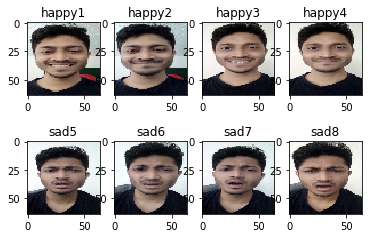

In [9]:
images = ["happy1","happy2","happy3","happy4","sad5","sad6","sad7","sad8"]
count = 1
for i in images:
    img_path = "images/" + i + ".jpg"
    ### END CODE HERE ###
    img = image.load_img(img_path, target_size=(64, 64))
    plt.subplot(2, 4, count)
    plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    count += 1
    print(i, happyModel.predict(x))
    if happyModel.predict(x)[0][0] == 1.0:
        title =  i
    elif happyModel.predict(x)[0][0] == 0.0:
        title = i
    plt.title(title)

In [10]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

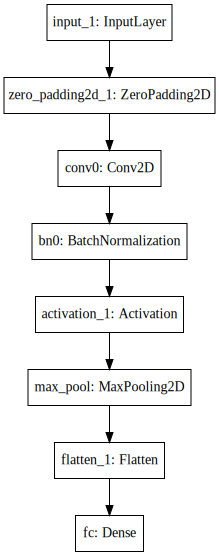

In [11]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))